In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = open('data.csv').readlines()

D = []
for i in range(len(Data)):
    Data[i] = Data[i].strip()
    D.append( [ float(dat) for dat in  Data[i].split(",")] )
    
time  = np.array(D).T[0]
Xtime = np.array(D).T[1]
Ytime = np.array(D).T[2]

N = len(time)
sample_rate = N/time[-1]
frequency = np.linspace (0, sample_rate/2, int (N/2))
Xfreq, Yfreq  = np.fft.fft(Xtime), np.fft.fft(Ytime)

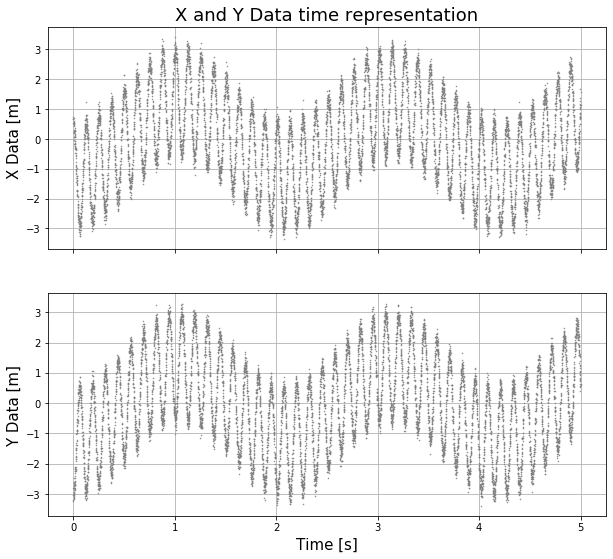

In [3]:
fig, axes  = plt.subplots(ncols = 1, nrows = 2, figsize  = [10,9], sharex= True)

axes[0].plot(time, Xtime, color = "gray", marker = ".", ls = "", markersize = 1, label = "X Data")
axes[1].plot(time, Ytime, color = "gray", marker = ".", ls = "", markersize = 1, label ="Y Data")

axes[0].set_ylabel("X Data [m]", fontsize = 15)
axes[1].set_ylabel("Y Data [m]", fontsize = 15)

axes[1].set_xlabel("Time [s]", fontsize = 15)

axes[0].grid(True) ; axes[1].grid(True)

axes[0].set_title("X and Y Data time representation", fontsize = 18)

plt.show()

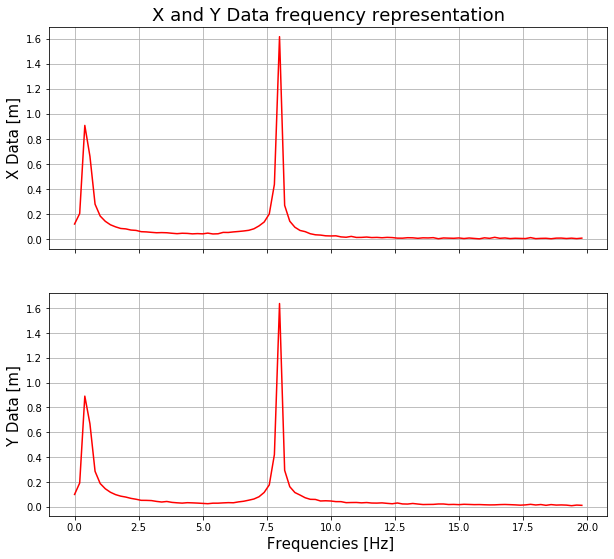

In [4]:
AmplX = 2/N * np.abs( Xfreq [0:np.int (N/2)])
AmplY = 2/N * np.abs( Yfreq [0:np.int (N/2)])

fig, axes  = plt.subplots(ncols = 1, nrows = 2, figsize  = [10,9], sharex= True)

axes[0].plot(frequency[0:100], AmplX[0:100], color = "red", label = "X Data")
axes[1].plot(frequency[0:100], AmplY[0:100], color = "red", label ="Y Data")

axes[0].set_ylabel("X Data [m]", fontsize = 15)
axes[1].set_ylabel("Y Data [m]", fontsize = 15)

axes[1].set_xlabel(" Frequencies [Hz]", fontsize = 15)

axes[0].grid(True) ; axes[1].grid(True)

axes[0].set_title("X and Y Data frequency representation", fontsize = 18)

plt.show()

In [ ]:
# Para X

AmplitudesX = 2/N * Xfreq [0:np.int (N/2)]
ModAmpX = np.abs(AmplitudesX)     #Modulo de las amplitudes de frecuencia

Upto = 2   # Para seleccionar el numero de frecuencias a seleccionar
indX = [np.where(np.abs(AmplitudesX)  == a )[0][0] for a in sorted(ModAmpX)[:-Upto-1:-1] ]
RealAmpX, ImagAmpX = AmplitudesX.real[ind] , AmplitudesX.imag[ind]

# Aqui estan los 7 parametros via analisis de Fourier

AmpsX = ModAmp[ind] 
PhsesX = np.arctan2(ImagAmp,RealAmp)
WsX = frequency[ind]
A0X = sum([Xtime[i] for i in range(N)])/N

# Para Y

AmplitudesY = 2/N * Yfreq [0:np.int (N/2)]
ModAmpY = np.abs(AmplitudesY)     #Modulo de las amplitudes de frecuencia

Upto = 2   # Para seleccionar el numero de frecuencias a seleccionar
indY = [np.where(np.abs(AmplitudesY)  == a )[0][0] for a in sorted(ModAmpY)[:-Upto-1:-1] ]
RealAmpY, ImagAmpY = AmplitudesY.real[ind] , AmplitudesY.imag[ind]


# Aqui estan los 7 parametros via analisis de Fourier

AmpsY= ModAmp[ind] 
PhsesY = np.arctan2(ImagAmp,RealAmp)
WsY = frequency[ind]
A0Y = sum([Ytime[i] for i in range(N)])/N


0.21339160790965156


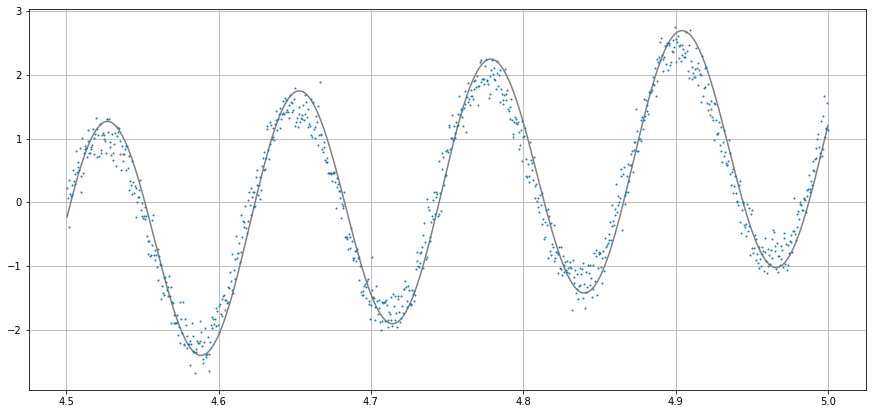

In [41]:
# Parametros optimos

#    [   A0 ,   A1 ,  w1 ,  f1 ,  A2  ,  w2 ,  f2 ]
PX = [-0.059, 1.950, 7.95, 0.10, 1.326, 0.48, 3.14]
PY = [-0.049, 1.834, 7.95, 3.28, 1.118, 0.48, 3.14]

Model = lambda P,t: P[0] + P[1]*np.cos(2*np.pi*P[2]*t+P[3]) + P[4]*np.cos(2*np.pi*P[5]*t+P[6])
χ2X = lambda P : sum([ (Model(P,t) - Xtime[i])**2 / np.abs(Model(P,t)) for i,t in enumerate(time) ])/N
χ2Y = lambda P : sum([ (Model(P,t) - Ytime[i])**2 / np.abs(Model(P,t)) for i,t in enumerate(time) ])/N

fig = plt.figure(figsize =[15,7])

Since = 9000
Until = 10000

print (χ2(PY))

plt.plot(time[Since:Until],Model(PX,time[Since:Until]), color = "gray")
plt.plot(time[Since:Until],Xtime[Since:Until], ls = "",marker= "o", ms= 1)

plt.grid()
plt.show()